In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
carpos = np.random.uniform(low=0, high=1, size=(100,2));
stationpos = np.random.uniform(low=0, high=1, size=(10,2));

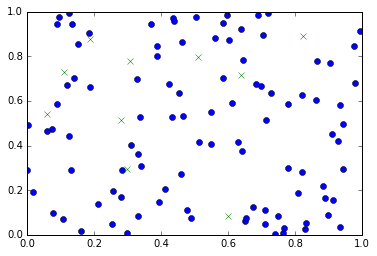

In [3]:
plt.plot(carpos[:,0], carpos[:,1], 'o', stationpos[:,0], stationpos[:,1], 'x');

100 cars(Blue dot) and 10 stations(green cross)

In [4]:
from scipy.spatial.distance import cdist

In [5]:
distcar2pos = cdist( carpos, stationpos, metric="euclidean" );
distcar2car = cdist( carpos, carpos, metric="euclidean" );

In [6]:
distcar2pos_missing = distcar2pos.copy();

In [7]:
missing = np.random.uniform(low=0, high=1, size=(100,10));

In [8]:
# impute missing distance by average
distcar2pos_missing[missing>0.9]=np.NaN;
for j in range(0, distcar2pos_missing.shape[1]):
    station = distcar2pos_missing[:,j];
    avg = np.nanmean(distcar2pos_missing[:,j]);
    for i in range(0,station.size):
        if np.isnan(station[i]):
            station[i]=avg
np.nansum(abs(distcar2pos_missing - distcar2pos))

19.473628204067516

In [9]:
# impute missing distance by non-missing distance of nearest car 
distcar2pos_missing[missing>0.9]=np.NaN;
for j in range(0, distcar2pos_missing.shape[1]):
    station = distcar2pos_missing[:,j];
    for i in range(0,station.size):
        if np.isnan(station[i]):
            station[i]=station[np.argwhere(station>0).T[0][np.argmin(distcar2car[i,np.argwhere(station>0).T[0]])]]
np.nansum(abs(distcar2pos_missing - distcar2pos))

3.5966440943724765

In [16]:
# impute missing distance by average non-missing of top n cars 
distcar2pos_missing[missing>0.9]=np.NaN;
# set the top n
n=4;
for j in range(0, distcar2pos_missing.shape[1]):
    station = distcar2pos_missing[:,j];
    for i in range(0,station.size):
        if np.isnan(station[i]):
            station[i]=np.mean(station[np.argwhere(station>0).T[0][np.argsort(distcar2car[i,np.argwhere(station>0).T[0]])[0:n]]])
np.nansum(abs(distcar2pos_missing - distcar2pos))

3.0704287080826234